In [19]:
import pandas as pd
import numpy as np
import pickle
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

In [2]:
with open('abstract_10000.pkl', 'rb') as f:
    abstract_10000 = pickle.load(f)

with open('title_list.pkl', 'rb') as f:
    title_list = pickle.load(f)

In [3]:
abstract_10000_np = list(map(lambda x: x.cpu().detach().numpy(), abstract_10000))

In [4]:
X = np.array(abstract_10000_np)

Silhouette Scores

In [5]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(X)
labels = kmeans_model.labels_
metric=metrics.silhouette_score(X, labels, metric='euclidean')
print(metric)

0.038432762


In [6]:
clustering = MeanShift().fit(X)
labels = clustering.labels_
metric=metrics.silhouette_score(X, labels, metric='euclidean') 
print(metric)

0.111812845


In [8]:
clustering = DBSCAN(eps=1, min_samples=10).fit(X)
labels = clustering.labels_
metric=metrics.silhouette_score(X, labels, metric='euclidean')
print(metric)  

0.06996198


PCA with K-means

In [11]:
# different PCAs for fixed cluster = 3

for pc in [1,2,3,4,5,50,100,200]:
    pca = PCA(n_components=pc)
    X_reduced = pca.fit_transform(X)

    kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X_reduced)
    labels = kmeans_model.labels_
    metric=metrics.silhouette_score(X_reduced, labels, metric='euclidean')
    print(f'Silhouette coefficient for number of 3 clusters with {pc} pca component : {metric:.4f}')

Silhouette coefficient for number of 3 clusters with 1 pca component : 0.5463
Silhouette coefficient for number of 3 clusters with 2 pca component : 0.3814
Silhouette coefficient for number of 3 clusters with 3 pca component : 0.2679
Silhouette coefficient for number of 3 clusters with 4 pca component : 0.2222
Silhouette coefficient for number of 3 clusters with 5 pca component : 0.1964
Silhouette coefficient for number of 3 clusters with 50 pca component : 0.0897
Silhouette coefficient for number of 3 clusters with 100 pca component : 0.0806
Silhouette coefficient for number of 3 clusters with 200 pca component : 0.0748


In [13]:
# PCA = 1 for cluster = 3, 5, 10

pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

for cluster in [3,5,10]:
    kmeans_model = KMeans(n_clusters=cluster, random_state=1).fit(X_reduced)
    labels = kmeans_model.labels_
    metric=metrics.silhouette_score(X_reduced, labels, metric='euclidean')
    print(f'Silhouette coefficient for number of {cluster} clusters : {metric:.4f}')

Silhouette coefficient for number of 3 clusters : 0.5463
Silhouette coefficient for number of 5 clusters : 0.5276
Silhouette coefficient for number of 10 clusters : 0.5206


In [14]:
# K-means btw 3 and 98 clusters for pca=1

performance_values = []

pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

for cluster in range(3,99):
    kmeans_model = KMeans(n_clusters=cluster, random_state=1).fit(X_reduced)
    labels = kmeans_model.labels_
    metric=metrics.silhouette_score(X_reduced, labels, metric='euclidean')
    performance_values.append(metric)   

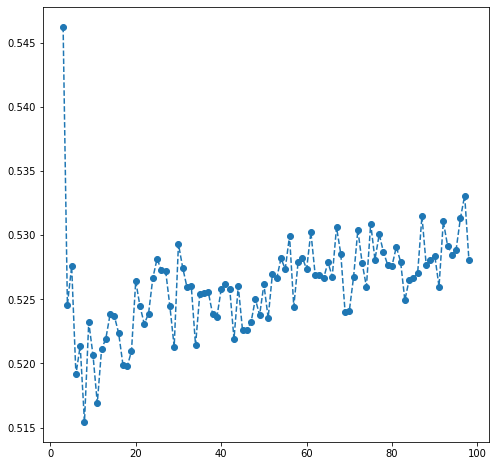

In [20]:
# PCA=1 performance with different clusters visualization

cluster_values = [i for i in range(3,99)]

plt.figure(figsize=(8,8))
plt.plot(cluster_values,performance_values, marker='o',linestyle='--')
plt.show()